# Lab work 1 : Machine Learning Basics

This notebook builds on the first lecture of Foundations of Machine Learning. We'll focus on the preprocessing pipeline, the actual models will come later, but for now, you'll see how each step gets us closer to a proper model.

Important note: the steps shown here are not always the most efficient or the most “industry-approved.” Their main purpose is pedagogical. So don't panic if something looks suboptimal—it's meant to be.

If you have questions (theoretical or practical), don't hesitate to bug your lecturer.

We will try to accurately predict the price of a diamond based on a [dataset]((https://www.kaggle.com/datasets/shivam2503/diamonds)). Let's first load the dataset.

In [1]:
import pandas as pd

df = pd.read_csv("NB1 - Diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Before diving into the dataset, notice that the column *Unnamed: 0* doesn't seem to carry any useful information.

**Task** : Use the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method to remove the *Unnamed: 0* column.

In [2]:
df = df.drop(columns=["Unnamed: 0"], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Here are the columns we'll be working with:

* **price** : price in US dollars ($326-$18,823)
* **carat** : weight of the diamond (0.2-5.01)
* **cut** : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** : diamond colour, from J (worst) to D (best)
* **clarity** : a measurement of how clear the diamond is from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, to IF (best)
* **x** : length in mm (0-10.74)
* **y** : width in mm (0-58.9)
* **z** : depth in mm (0-31.8)
* **depth** : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
* **table** : width of top of diamond relative to widest point (43-95)

We're all eager to jump into machine learning, so let's build our very first linear regressor!

## My first model !

We know that a linear regression only works with numerical inputs. So, in this case, we can use the columns *carat*, *x*, *y*, *z*, *depth* and *table* to predict the target column *price*. 

**Task** : From the dataframe *df*, extract a matrice *X* (the features) and a vector *y* (the target). Then use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split *X* and *y* into training and test sets.

In [3]:
from sklearn.model_selection import train_test_split

X = df[["carat", "x", "y", "z", "depth", "table"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

Now that we have our training and test sets, it's time to train and evaluate! We'll measure performance with two metrics: [`RMSE`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error) and [`MAE`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error).


**Task** : Using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class, fit a model on the training set. Then use the `predict` method to make predictions on the test set and print out performance for both metrics.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")

RMSE: 1481.10
MAE: 887.88


So... is our model actually any good?

**Task** : Interpret the results you just got, and then compute the performance of a very simple baseline model for comparison.

In [5]:
y_pred = [y_train.mean()] * len(y_test)
RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")

RMSE: 4024.97
MAE: 3059.58


It could definitely be better. Let's take a step back and reflect:

1. We chose columns just based on their type. That means we ignored categorical data and didn't even check whether the values made sense.
2. We trained the model once and didn't checked for overfitting.

Maybe we rushed things a bit. Time to get back to the bread and butter of data science: data preparation.

## Data quality

**Task** : Use the [`isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method together with `sum` to check for missing values in the dataset and interpret.

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Task** : Use the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method to examine the distributions of the numerical variables, and then interpret the results.

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values for *x*, *y*, and *z* are 0. So apparently... we have some 2D diamonds ?!

**Task**: Display all observations where at least one of the three dimension variables is equal to 0.

In [8]:
df.loc[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0), ]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Clearly, these *flat diamonds* make no sense for our study, they're just data collection errors.

**Task**: Remove these observations, and report the dataset size before and after the cleanup.

In [9]:
print(f"Before : {df.shape[0]}")
df = df.loc[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0), ]
print(f"After : {df.shape[0]}")

Before : 53940
After : 53920


So far, we haven't really looked at any distributions. Let's explore the distribution of a column, say *carat*, and how it relates to the target.

**Task**: Build a function explore_column with the following parameters:
* *df*: the dataframe containing the columns of interest
* *column*: the name of the column you want to inspect
* *target_column*: the name of the target column

The function should display, side by side, a histogram of the column and a scatter plot showing its relationship with the target.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")


def explore_column(df, column, target_column, alpha=0.8, figsize=(12, 6)):
    
    def plot_histogram():
        plt.hist(df[column])
        plt.xlabel(column.capitalize())
        plt.title(f"Distribution for {column}")
    
    def plot_price(alpha=alpha):
        plt.scatter(x=df[column], y=df[target_column], alpha=alpha)
        plt.xlabel(column.capitalize())
        plt.ylabel(target_column.capitalize())
        plt.title("%s in function of %s" % (target_column.capitalize(), column))
    
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_histogram()
    plt.subplot(1, 2, 2)
    plot_price()
    
    plt.suptitle("Variable %s" % column)
    plt.show()

**Task** : Use the previous function on the *y* column.

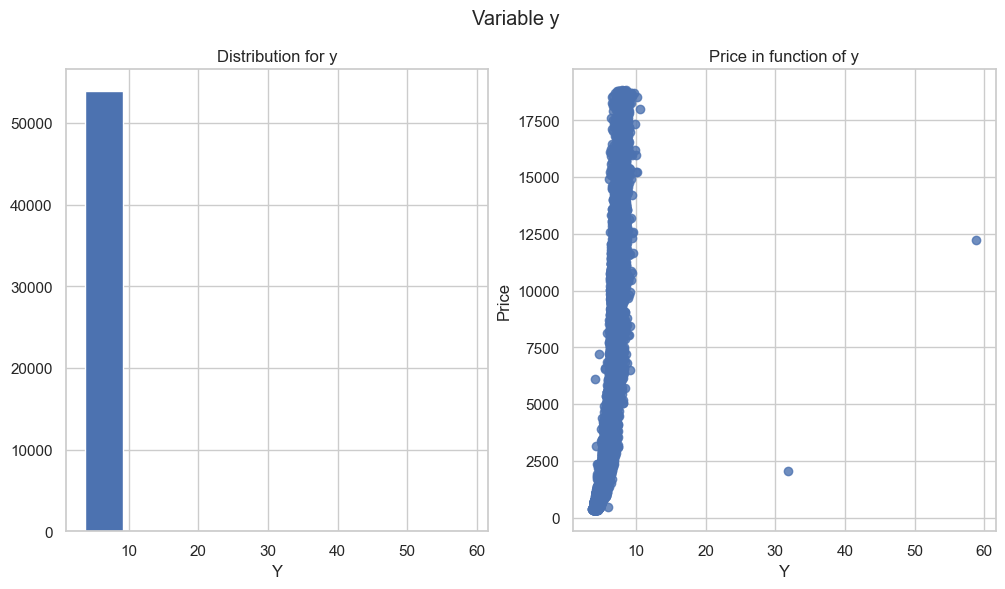

In [11]:
explore_column(df, "y", "price")

Looks like we have some outliers! These two points could seriously mess with our predictions because they don't follow the trend. To make this clearer, here's a small toy example illustrating the effect.

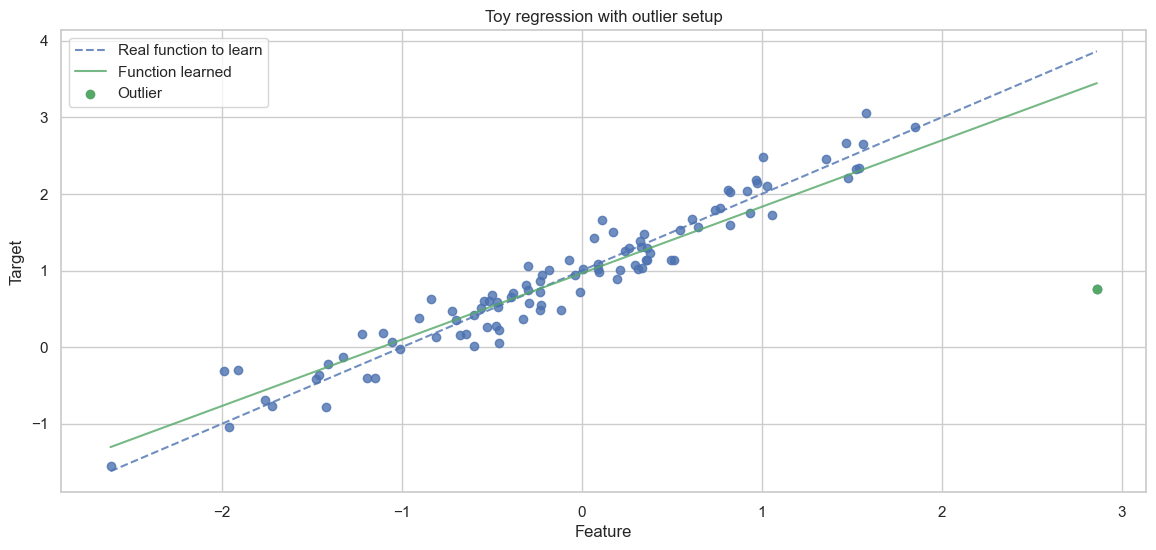

In [12]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
%matplotlib inline

size = 100
sigma = 0.25
function_real = lambda x: x + 1

x = np.random.normal(size=size)
y = function_real(x) + sigma * np.random.normal(size=size)

offset = 3
random_index = np.random.randint(0, size)
x[random_index] = x[random_index] + offset

x_range = np.array([np.min(x), np.max(x)])

model = LinearRegression().fit(x.reshape(-1, 1), y)
function_learned = lambda x: model.coef_[0] * x + model.intercept_

plt.figure(figsize=(14, 6))
plt.plot(x_range, function_real(x_range), ls='--', alpha=0.8, color=sns.color_palette()[0], label="Real function to learn")
plt.plot(x_range, function_learned(x_range), alpha=0.8, color=sns.color_palette()[2], label="Function learned")
plt.scatter(x, y, alpha=0.8)
plt.scatter(x[random_index], y[random_index], color=sns.color_palette()[2], label="Outlier")

plt.title("Toy regression with outlier setup")
plt.ylabel("Target")
plt.xlabel("Feature")
plt.legend()
plt.show()

**Task** : Remove the outliers from the *y* column, then explore the other columns as needed. Make sure to print the number of observations before and after the cleanup.

In [13]:
print(f"Before : {df.shape[0]}")
df = df.loc[df["y"] < 30, ]
df = df.loc[(df["z"] < 10) & (df["z"] > 2), ]
print(f"After : {df.shape[0]}")

Before : 53920
After : 53914


For a deeper dive into outliers, one can see [here](https://github.com/theo-lq/ML-IF-STIN/tree/master/Bonus/Outliers).

Next, we need to handle the categorical variables. A good way to explore them is with a violin plot.

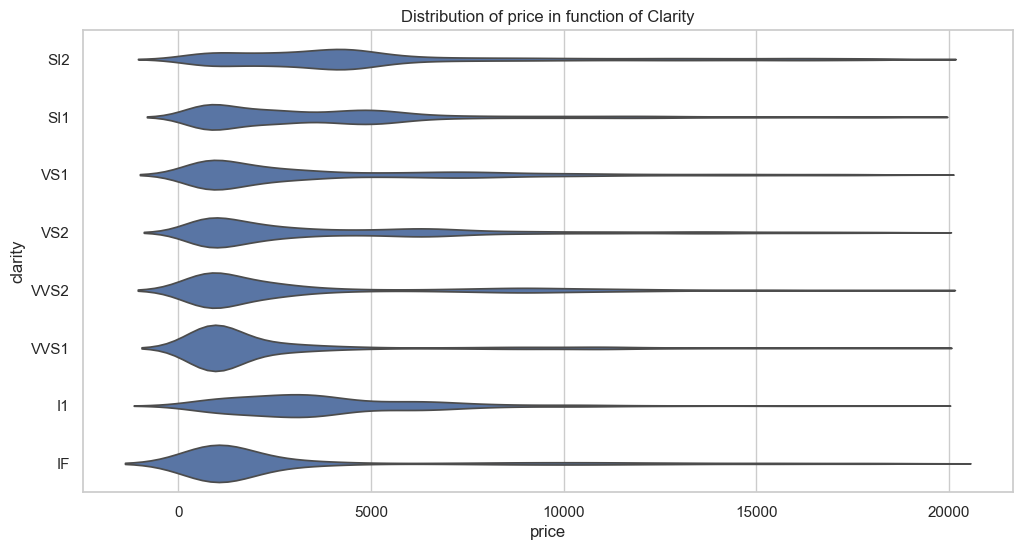

In [14]:
def make_violin_plot(column, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, x="price", y=column, inner=None)
    plt.title("Distribution of price in function of %s" % column.capitalize())
    plt.show()

make_violin_plot("clarity")

After carefully exploring all the categorical variables, it's time to transform them into a format our model can use. One-Hot Encoding is a good choice here.

**Task** : Use the [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function to perform One-Hot-Encoding. Don't forget to check the number of columns before and after the transformation.

In [15]:
df = pd.get_dummies(df, columns=["cut", "color", "clarity"])
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


How useful were all these preprocessing steps for our task? Let's find out by measuring performance again.

**Task**: Split the data into training and test sets, then train the model and evaluate its performance on the test set. Compare the results to your previous predictions and provide some commentary.

In [16]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")

RMSE: 1125.29
MAE: 735.32


So far, we've only measured performance on the test set and didn't checked for overfitting. 

**Task**: Is there overfitting here ?

In [21]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

RMSE_train = root_mean_squared_error(y_true=y_train, y_pred=y_pred_train)
RMSE_test = root_mean_squared_error(y_true=y_test, y_pred=y_pred_test)
MAE_train = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
MAE_test = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)

print(f"RMSE: {RMSE_test:.4f} vs {RMSE_train:.4f} (train)")
print(f"RMSE: {MAE_test:.4f} vs {MAE_train:.4f} (train)")

RMSE: 1125.2928 vs 1120.4538 (train)
RMSE: 735.3212 vs 730.3612 (train)


We want to understand how each part of our preprocessing affects prediction quality. To do this, we'll measure performance at each key step.

**Task**: Define a function named train_predict with the following parameters:
* *X*: feature matrix
* *y*: target vector
* *metric*: a performance metric

The function should generalize the code from the previous cell so it can be reused for different preprocessing steps.

In [28]:
def train_predict(X, y, metric=root_mean_squared_error):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metric_train = metric(y_true=y_train, y_pred=y_pred_train)
    metric_test = metric(y_true=y_test, y_pred=y_pred_test)

    name = metric.__name__
    print(f"{name}: {metric_test:.4f} vs {metric_train:.4f} (train)")

**Task** : Write a cell that measure performance at each key steps of the notebook. 

In [29]:
df = pd.read_csv("NB1 - Diamonds.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)
X = df[["carat", "x", "y", "z", "depth", "table"]]
y = df["price"]

print("Start:")
train_predict(X, y, metric=root_mean_squared_error)
train_predict(X, y, metric=mean_absolute_error)
print()


df = df.loc[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0), ]
X = df[["carat", "x", "y", "z", "depth", "table"]]
y = df["price"]

print("After removing flat diamonds:")
train_predict(X, y, metric=root_mean_squared_error)
train_predict(X, y, metric=mean_absolute_error)
print()


df = df.loc[df["y"] < 30, ]
df = df.loc[(df["z"] < 10) & (df["z"] > 2), ]
X = df[["carat", "x", "y", "z", "depth", "table"]]
y = df["price"]

print("After removing outliers:")
train_predict(X, y, metric=root_mean_squared_error)
train_predict(X, y, metric=mean_absolute_error)
print()


df = pd.get_dummies(df, columns=["cut", "color", "clarity"])
X = df.drop(columns=["price"])
y = df["price"]

print("After using OHE:")
train_predict(X, y, metric=root_mean_squared_error)
train_predict(X, y, metric=mean_absolute_error)
print()

Start:
root_mean_squared_error: 1468.2399 vs 1506.5604 (train)
mean_absolute_error: 889.0671 vs 895.4399 (train)

After removing flat diamonds:
root_mean_squared_error: 1551.0829 vs 1474.2804 (train)
mean_absolute_error: 887.8618 vs 879.0822 (train)

After removing outliers:
root_mean_squared_error: 1448.7034 vs 1495.5510 (train)
mean_absolute_error: 890.2632 vs 884.7732 (train)

After using OHE:
root_mean_squared_error: 1133.2076 vs 1117.8411 (train)
mean_absolute_error: 733.9008 vs 731.8800 (train)



## Going further

Exploring your model's predictions—especially the errors—is a crucial part of improving it. This helps you understand how the model reacts to different inputs and can guide you toward better preprocessing, feature engineering, or even model improvements.

**Task**: Inspect the errors of the model and reflect on what they reveal.